In [1]:
import numpy as np
import pandas as pd

import math
from random import shuffle
import random
random.seed(0)

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

givenDec = lambda gdVal: float('%.1f' % gdVal) # 1 digit
givenDec3 = lambda gdVal: float('%.3f' % gdVal) # 3 digit

print(givenDec(3.23454354))
print(givenDec3(12.5643563456))

3.2
12.564


### Classification

In [2]:
# function to generate data points for family car example
def generateCarTypeData(gnPoints):
    
    engine_power_all = []
    price_all = []
    famCar_class = []

    for i in range(gnPoints):
        rnd_val = np.random.random()
        rnd_val_e = np.random.random()
        rnd_val_p = np.random.random()
        if(rnd_val < 0.5):
            famCar_class.append(0)
            tmp_eng_power = np.random.randint(low=50, high=240)
            tmp_price = np.random.randint(low=10, high=100)

            while (120<tmp_eng_power<180 and 25<tmp_price<50):
                tmp_eng_power = np.random.randint(low=50, high=240)
                tmp_price = np.random.randint(low=10, high=100)

            engine_power_all.append(tmp_eng_power)
            price_all.append(tmp_price)
        else:
            famCar_class.append(1)
            engine_power_all.append(np.random.randint(low=120, high=180))
            price_all.append(np.random.randint(low=25, high=50))

    tmp_df = pd.DataFrame({
        "e":engine_power_all,
        "p":price_all,
        "c":famCar_class
    })
    
    return tmp_df


In [3]:
my_df = generateCarTypeData(gnPoints=40)
my_df

,e,p,c
0,154,11,0
1,139,42,1
2,178,47,1
3,123,22,0
4,72,95,0
5,153,31,1
6,143,30,1
7,193,97,0
8,158,48,1
9,110,51,0


A scatter plot of data points

<AxesSubplot:xlabel='e', ylabel='p'>

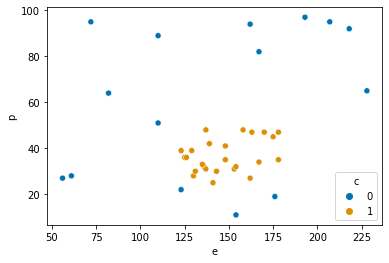

In [4]:
#plt.scatter(my_df.e, my_df.p, marker='o');
sns.scatterplot(x="e", y="p", hue="c", data=my_df, palette="colorblind")

In [5]:
# get the min price of a family car from the data set my_df
my_df[my_df['c']==1]['p'].min()

25

In [6]:
# get the max price of a NON-family car that is smaller than minimum price of a family car
min_price = my_df[my_df['c']==1]['p'].min()
print(min_price)
my_df[(my_df['c']==0) & (my_df['p'] < min_price)]['p'].max()

25


22

In [7]:
max_price = my_df[my_df['c']==1]['p'].max()
print(max_price)
my_df[(my_df['c']== 0) & (my_df['p'] > max_price)]['p'].min()

48


51

In [8]:
max_price_e = my_df[my_df['c']==1]['e'].max()
print(max_price)
my_df[(my_df['c']== 0) & (my_df['e'] > max_price_e)]['e'].min()

48


193

In [9]:
min_price_e = my_df[my_df['c']==1]['e'].min()
print(min_price)
my_df[(my_df['c']==0) & (my_df['e'] < min_price_e)]['e'].max()

25


110

In [10]:
# from 2D data, get the range values associated with a family car
def getRange_familyCar(gdf):
    min_price = gdf[gdf['c']==1]['p'].min()
    max_price = gdf[gdf['c']==1]['p'].max()
    min_engine = gdf[gdf['c']==1]['e'].min()
    max_engine = gdf[gdf['c']==1]['e'].max()
    
    return min_price, max_price, min_engine, max_engine
    

In [11]:
print(getRange_familyCar(my_df))

(25, 48, 123, 178)


$\color{red}{\text{Question:}}$ Implement a function that returns min/max price/engine power values that define the LARGEST rectangle classifier

In [12]:
def getRange_familyCar_large(gdf):
    min_price = 0
    max_price = 0
    min_engine = 0
    max_engine = 0
    
    min_price_p = gdf[gdf['c']==1]['p'].min()
    min_price = gdf[(gdf['c']==0) & (gdf['p'] < min_price_p)]['p'].max()
    
    max_price_p = gdf[gdf['c']==1]['p'].max()
    max_price = gdf[(gdf['c']== 0) & (gdf['p'] > max_price_p)]['p'].min()
    
    max_price_e = gdf[gdf['c']==1]['e'].max()
    max_engine = gdf[(gdf['c']== 0) & (gdf['e'] > max_price_e)]['e'].min()
    
    min_price_e = gdf[gdf['c']==1]['e'].min()
    min_engine = gdf[(gdf['c']==0) & (gdf['e'] < min_price_e)]['e'].max()
     
    
    return min_price, max_price, min_engine, max_engine

In [13]:
import numpy as np
print(getRange_familyCar_large(my_df))


(22, 51, 110, 193)


$\color{red}{\text{Question:}}$ Implement a function that returns min/max price/engine power values that define a medium (between smallest and largest) rectangle classifier

In [14]:
def getRange_familyCar_medium(gdf):
    min_price = 0
    max_price = 0
    min_engine = 0
    max_engine = 0
    
    min_p_s, max_p_s, min_e_s, max_e_s = getRange_familyCar(my_df)
    min_p_l, max_p_l, min_e_l, max_e_s = getRange_familyCar_large(my_df)
    
    min_price = np.average([min_p_s, min_p_l])
    max_price = np.average([max_p_s, max_p_l])
    min_engine = np.average([min_e_s, min_e_l])
    max_engine = np.average([max_e_s, max_e_s])
    
    return min_price, max_price, min_engine, max_engine

In [15]:
min_p, max_p, min_e, max_e = getRange_familyCar(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

min_p, max_p, min_e, max_e = getRange_familyCar_large(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

min_p, max_p, min_e, max_e = getRange_familyCar_medium(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

rectangle 25 48 123 178
rectangle 22 51 110 193
rectangle 23.5 49.5 116.5 193.0


In [16]:
def classify_instance_byRectangle(min_price, max_price, min_engine, max_engine, gdf_instance):
    if(min_engine<gdf_instance.e<max_engine and min_price<gdf_instance.p<max_price):
        return 1
    else:
        return 0

In [17]:
# first row of the data set
my_df.iloc[0]

e    154
p     11
c      0
Name: 0, dtype: int64

In [18]:
classify_instance_byRectangle(25, 47, 121, 177, my_df.iloc[1])

1

$\color{red}{\text{Question:}}$ Implement a function that classifies a given data point using a circle classifier (obtained through data points that encapsulate family cars in the data set)

In [19]:
def classify_instance_byCircle(min_price, max_price, min_engine, max_engine, gdf_instance):
    
    r_p = np.average([min_price, max_price])
    r_e = np.average([min_engine, max_engine])
    
    r = ( max_price - min_price ) / 2
    
    r_square = r * r
    
    instance = (gdf_instance.p - r_p) * (gdf_instance.p - r_p) + (gdf_instance.e - r_e) * (gdf_instance.e - r_e)
    
    if instance <= r_square:
        return 1
    else:
        return 0

In [20]:
print(classify_instance_byCircle(25, 47, 121, 177, my_df.iloc[1]))

0


$\color{red}{\text{Question:}}$ Implement a function that classifies a given data point using a ellipsoid classifier (obtained through data points that encapsulate family cars in the data set)

In [21]:
def classify_instance_byEllipsoid(min_price, max_price, min_engine, max_engine, gdf_instance):
    r_p = np.average([min_price, max_price])
    r_e = np.average([min_engine, max_engine])
    a = abs((min_price - max_price)/2)
    b = abs((min_engine - max_engine)/2)
    instance = (( gdf_instance.p - r_p)**2 /( a**2 ) ) + (( gdf_instance.e-r_e)**2 / ( b**2 ))
    if instance <= 1:
        return 1
    else:
        return 0

In [22]:
print(classify_instance_byEllipsoid(25, 47, 121, 177, my_df.iloc[3]))

0


In [23]:
test_df = generateCarTypeData(gnPoints=20) # you might want to try different test set sizes

In [24]:
min_p, max_p, min_e, max_e = getRange_familyCar(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byRectangle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle 25 48 123 178
[0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0]
[0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0]
d_accuracy 0.95


$\color{red}{\text{Question:}}$ What is the classification accuracy when getRange_familyCar_large() function is used for obtaining the boundaries for family cars and classify_instance_byRectangle() function is used for classifying the instances in the test set

In [25]:
min_p, max_p, min_e, max_e = getRange_familyCar_large(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byRectangle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle 22 51 110 193
[0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0]
[0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0]
d_accuracy 1.0


$\color{red}{\text{Question:}}$ What is the classification accuracy when getRange_familyCar_medium() function is used for obtaining the boundaries for family cars and classify_instance_byRectangle() function is used for classifying the instances in the test set

In [26]:
min_p, max_p, min_e, max_e = getRange_familyCar_medium(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byRectangle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle 23.5 49.5 116.5 193.0
[0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0]
[0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0]
d_accuracy 1.0


$\color{red}{\text{Question:}}$ What is the classification accuracy when getRange_familyCar_medium() function is used for obtaining the boundaries for family cars and classify_instance_byCircle() function is used for classifying the instances in the test set

In [27]:
min_p, max_p, min_e, max_e = getRange_familyCar_medium(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byCircle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle 23.5 49.5 116.5 193.0
[0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0]
[0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
d_accuracy 0.8


$\color{red}{\text{Question:}}$ What is the classification accuracy when getRange_familyCar_medium() function is used for obtaining the boundaries for family cars and classify_instance_byEllipsoid() function is used for classifying the instances in the test set

In [28]:
min_p, max_p, min_e, max_e = getRange_familyCar_medium(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byEllipsoid(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle 23.5 49.5 116.5 193.0
[0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0]
[0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0]
d_accuracy 0.85


### Regression

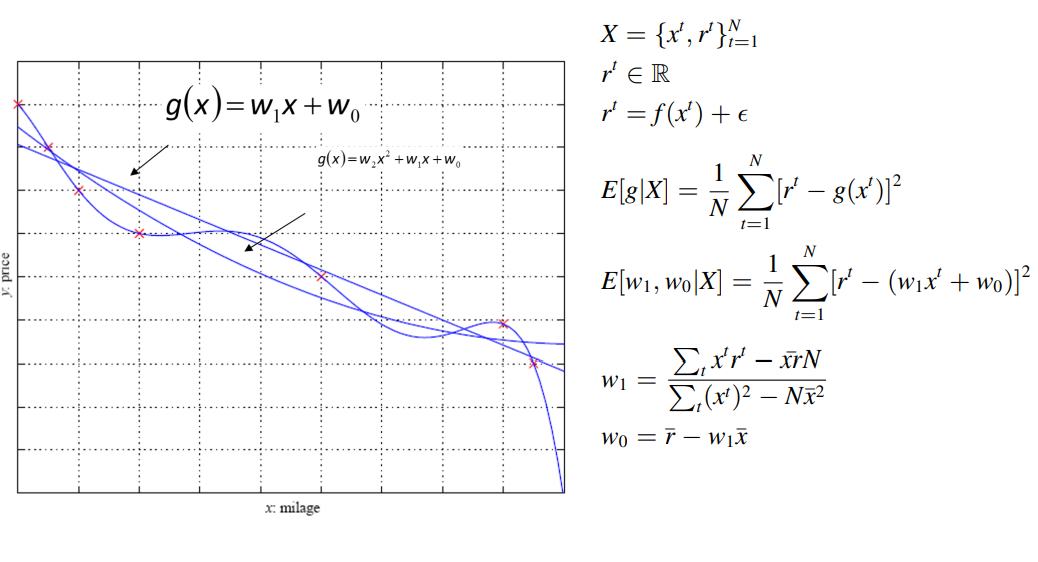

$\color{red}{\text{Question:}}$ Given a set of actual labels (gLabels) and predicted labels (gPredictedLabels), implement a function that returns RMSE

In [29]:
def getRMSE(glabels, gPredictedLabels):
    error = [(x-y)**2 for x,y in zip(glabels, gPredictedLabels)]
    RMSE = math.sqrt(sum(error)/len(glabels))    
    return RMSE

A function that generates data points according to the equation (r = mx + b + noise) where m=2.25, b = 6, and noise$\sim N(0,1.21)$

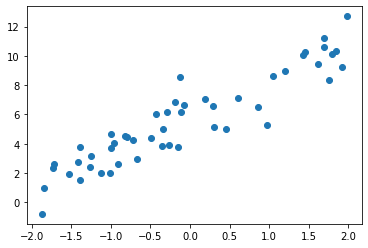

In [30]:
n_points = 50

b = 6 # intercept
m = 2.25 # slope
noise_mean = 0.0
noise_var = 1.21

X = []
r = []
for i in range(n_points):
    #rnd_num = random.random()
    rnd_num = np.random.uniform(-2, 2)
    X.append(rnd_num)
    r.append(b + m*rnd_num + np.random.normal(loc=noise_mean, scale=noise_var))
    #r.append(b + m *rnd_num)

plt.scatter(X, r, marker='o');

In [31]:
print(len(X), 
len(r))

50 50


$\color{red}{\text{Question:}}$ Calculate $w_0$ and $w_1$ values in linear regression equation $r = w_0+w_1*x$ based on the closed form expressions.

In [32]:
def cal_coefficents(x,r,n):
    sigma_num = [x*r for x,r in zip(x,r)]
    sigma_deno = [x*x for x,r in zip(x,x)]
    num = sum(sigma_num) - np.mean(x)*np.mean(r) * n
    deno =sum(sigma_deno) - n*np.mean(x)**2
    w_1 = num / deno
    w_0 = np.mean(r) - w_1 * np.mean(x)   
    return w_1, w_0


In [33]:
print(cal_coefficents(X,r,len(X)))

(2.4324543610576077, 5.807883034926797)


$\color{red}{\text{Question:}}$ Report the error with the calculated w_1 and w_0.

Hint: Use getRMSE() function that you have implemented

In [34]:
# Report the error with the calculated w_1 and w_0
w1, w0 = cal_coefficents(X,r, len(X))
y_pred = []
for x in X:
    y_pred.append(w1*x + w0)

In [35]:
RMSE = getRMSE(r, y_pred)
RMSE

1.1664712418690881

$\color{red}{\text{Question:}}$ Plot the data points along with the fitted line.

Hint: Use mathplotlib library's plot function

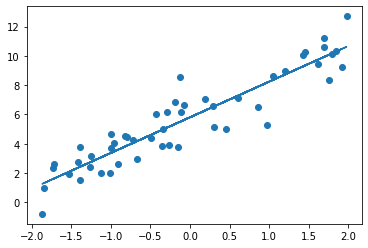

In [36]:
# Plot the data points along with the fitted line
plt.scatter(X, r, marker='o')
plt.plot(X, y_pred)

using library functions for linear regression

In [37]:
xx = np.array(X)
rr = np.array(r)

# transforming the data to include another axis
xx = xx[:, np.newaxis]
rr = rr[:, np.newaxis]

# sklearn linear regression function
model = LinearRegression()
model.fit(xx, rr)
r_pred = model.predict(xx)

# The coefficients + Intercept
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

RMSE = getRMSE(rr, r_pred)
print("RMSE",RMSE)

# insert codes for plotting the fitted function

Intercept: 
 [5.80788303]
Coefficients: 
 [[2.43245436]]
RMSE 1.1664712418690881


using library functions for polynomial regression

In [38]:
import operator
from sklearn.preprocessing import PolynomialFeatures

def polyFit(gxx, grr, gnDegree):

    polynomial_features= PolynomialFeatures(degree=gnDegree)
    x_poly = polynomial_features.fit_transform(gxx)

    model = LinearRegression()
    model.fit(x_poly, grr)
    r_poly_pred = model.predict(x_poly)

    # The coefficients + Intercept
    print('Intercept: \n', model.intercept_)
    print('Coefficients: \n', model.coef_)
    
    #RMSE = getRMSE(gxx, grr, r_poly_pred)
    #print('RMSE',RMSE)

    plt.scatter(gxx, grr, s=10)

    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(gxx,r_poly_pred), key=sort_axis)
    gxx, r_poly_pred = zip(*sorted_zip)
    plt.plot(gxx, r_poly_pred, color='m')
    plt.show()
    
    return model.intercept_, model.coef_

Intercept: 
 [5.78676552]
Coefficients: 
 [[0.         2.42897048 0.01527005]]


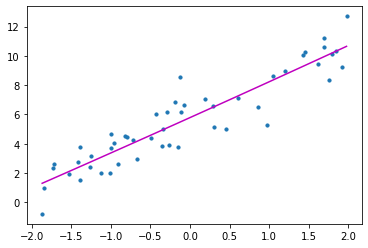

(array([5.78676552]), array([[0.        , 2.42897048, 0.01527005]]))

In [39]:
xx = np.array(X)
rr = np.array(r)

# transforming the data to include another axis
xx = xx[:, np.newaxis]
rr = rr[:, np.newaxis]

polyFit(xx, rr, gnDegree=2)

Intercept: 
 [5.71300149]
Coefficients: 
 [[0.         1.87778131 0.00350517 0.2228806 ]]


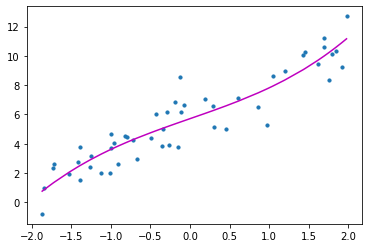

(array([5.71300149]),
 array([[0.        , 1.87778131, 0.00350517, 0.2228806 ]]))

In [40]:
polyFit(xx, rr, gnDegree=3)

Intercept: 
 [6.00568602]
Coefficients: 
 [[ 0.          1.80786318 -1.67795461  0.15303373  1.25371903  0.03311211
  -0.23117741]]


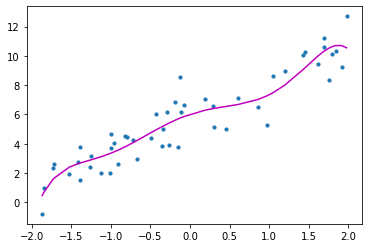

(array([6.00568602]),
 array([[ 0.        ,  1.80786318, -1.67795461,  0.15303373,  1.25371903,
          0.03311211, -0.23117741]]))

In [41]:
polyFit(xx, rr, gnDegree=6)